# LangChain: Chain


O que é um Chain?

é uma maneira de estruturar o fluxo de trabalho de um projeto que envolve modelos de linguagem, permitindo que você conecte diferentes componentes, como prompts, modelos de IA, parsers de saída, ou até mesmo APIs externas, em uma sequência lógica.

---

In [2]:
# Importando Bibliotecas
import os
from dotenv import load_dotenv

#Carregando API KEY da OpenAI diretamente da minha variável de ambiente .env

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


In [3]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [4]:
llm_model = "gpt-4o-mini"
model = ChatOpenAI(temperature=0.9, model=llm_model)

In [5]:
prompt = ChatPromptTemplate.from_template(
    "Qual melhor nome para descrever um gatinho com as \
    seguintes características: {caracteristicas} ?"
)

### LMMChain

In [7]:
chain = LLMChain(llm=model, prompt=prompt)
caracteristicas = "Gatinho filhote, ele é cinza e todo listrado"
chain.run(caracteristicas)

'Um bom nome para um gatinho filhote cinza e listrado poderia ser "Listrado" ou "Rayas", que significa "listras" em espanhol. Outros nomes que podem combinar com as características dele são "Ziggy", "Stripes" (que significa "listras" em inglês), ou "Fumaça". Se você quiser algo mais divertido, "Tigrinho" ou "Mistral" também são boas opções! Escolha aquele que você acha que combina mais com a personalidade dele.'

---

In [8]:
import pandas as pd

In [129]:
df = pd.read_csv("Data.csv")
# Dados de venda de café
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [130]:
# Descobrindo se existem dados faltantes (eu removeria se tivesse, como é para um exemplo simples de teste
# eu não me importaria em tratar tando os dados.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1395 non-null   object 
 1   datetime     1395 non-null   object 
 2   cash_type    1395 non-null   object 
 3   card         1306 non-null   object 
 4   money        1395 non-null   float64
 5   coffee_name  1395 non-null   object 
dtypes: float64(1), object(5)
memory usage: 65.5+ KB


---

### Simple Sequential Chain

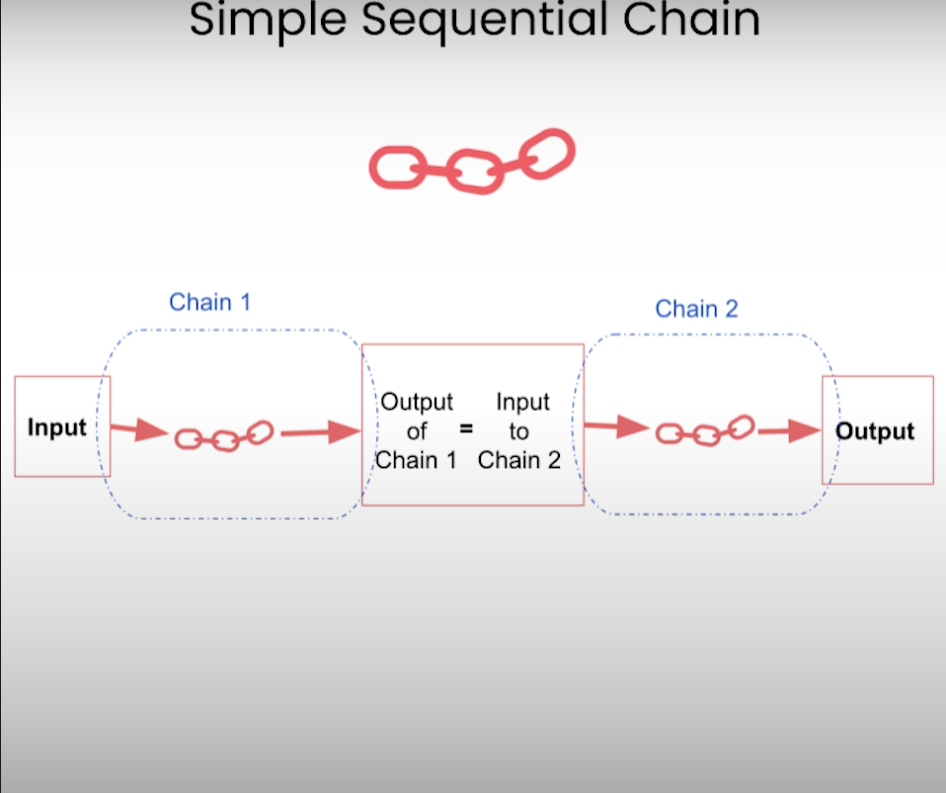

In [17]:
from langchain.chains import SimpleSequentialChain

In [18]:
model = ChatOpenAI(temperature=0.9, model=llm_model)

In [65]:
# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "Faça um dicionário de variáveis (ou seja, uma explicação do que se trata) \
    cada variável do meu dataset: {df}"
)

# Chain1

chain_one = LLMChain(llm=model, prompt=first_prompt)

In [69]:
# prompt template 2

second_prompt = ChatPromptTemplate.from_template(
    "Dê sugestões de nome para minha loja com base nos produtos vendidos: {df}"
)

chain_two = LLMChain(llm=model, prompt=second_prompt)

In [70]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two], 
                                             verbose=True)

In [71]:
overall_simple_chain.run(df)



> Entering new SimpleSequentialChain chain...
Aqui está um dicionário de variáveis para o seu dataset, explicando o que cada variável representa:

1. **date**: 
   - **Descrição**: Data da transação, representada no formato YYYY-MM-DD. Indica o dia em que a compra foi realizada.

2. **datetime**: 
   - **Descrição**: Data e hora exatas da transação, incluindo milissegundos, no formato YYYY-MM-DD HH:MM:SS.sss. Proporciona informações detalhadas sobre o momento da compra.

3. **cash_type**: 
   - **Descrição**: Tipo de meio de pagamento utilizado na transação. Neste caso específico, todos os registros parecem ser feitos com cartão ("card").

4. **card**: 
   - **Descrição**: Identificação do cartão utilizado na transação. Os valores são anônimos (ANON- seguido de um número), indicando que as informações pessoais dos usuários estão protegidas.

5. **money**: 
   - **Descrição**: Valor monetário da transação, representado em uma unidade de moeda (presumivelmente em reais, mas isso deve s

'Com base na descrição dos produtos vendidos na sua loja, que parece ser focada em bebidas à base de café, aqui estão algumas sugestões de nomes para a sua loja:\n\n1. **Café em Cartão**\n2. **Latte & Co.**\n3. **Cappuccino Corner**\n4. **Mundo do Café**\n5. **Sabor de Café**\n6. **Café na Hora**\n7. **Café e Conexão**\n8. **Aromas de Café**\n9. **Café do Dia**\n10. **Café e Companhia**\n11. **Expresso Delights**\n12. **Café de Gourmet**\n13. **Café & Amor**\n14. **Café Charmoso**\n15. **Café do Cartão** \n\nEsses nomes refletem o foco nos produtos de café e podem atrair clientes que estão em busca de uma experiência agradável ao consumir suas bebidas favoritas. Escolha aquele que mais ressoe com a identidade que você deseja criar para a sua loja.'

----

### Sequential Chain

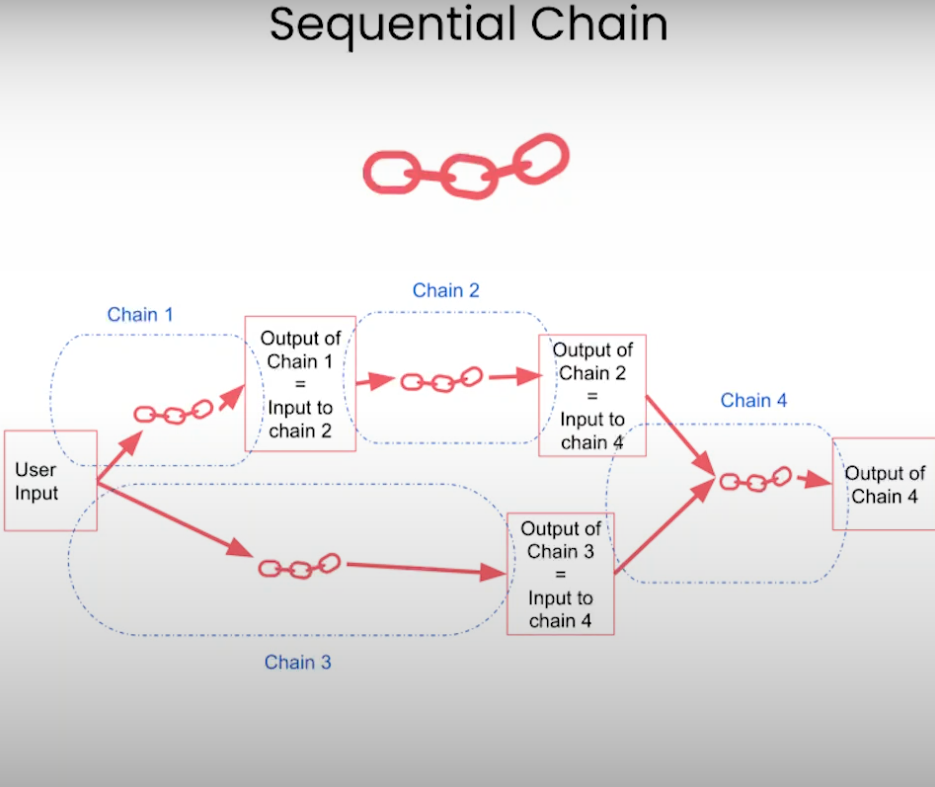

In [77]:
from langchain.chains import SequentialChain

In [72]:
model = ChatOpenAI(temperature=0.9, model=llm_model)

In [132]:
first_prompt = ChatPromptTemplate.from_template(
    """Quantas observações foram feitas no dataset: {df}"""
)

second_prompt = ChatPromptTemplate.from_template(
    """Você consegue me passar alguns insights sobre essa base de dados?"""
)

third_prompt = ChatPromptTemplate.from_template(
    """Como eu poderia fazer uma análise exploratória nessa base?"""
)


In [133]:
chain_one = LLMChain(llm=model, prompt=first_prompt,
                     output_key="Qnt_obs")

chain_two = LLMChain(llm=model, prompt=second_prompt,
                     output_key="Insights")

chain_three = LLMChain(llm=model, prompt=third_prompt,
                     output_key="EDA")


In [134]:
overall_chain = SequentialChain(
    chains = [chain_one, chain_two, chain_three],
    input_variables = ["df"],
    output_variables = ["Qnt_obs", "Insights", "EDA"],
    verbose= True
)

In [135]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1390,2024-08-27,2024-08-27 10:04:04.563,card,ANON-0000-0000-0375,32.82,Latte
1391,2024-08-28,2024-08-28 12:08:18.772,card,ANON-0000-0000-0551,27.92,Americano with Milk
1392,2024-08-28,2024-08-28 12:10:04.139,card,ANON-0000-0000-0551,32.82,Cappuccino
1393,2024-08-28,2024-08-28 12:35:06.944,card,ANON-0000-0000-0375,23.02,Americano


In [136]:
overall_chain(df)



> Entering new SequentialChain chain...

> Finished chain.


{'df':             date                 datetime cash_type                 card  \
 0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
 1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
 2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
 3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
 4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
 ...          ...                      ...       ...                  ...   
 1390  2024-08-27  2024-08-27 10:04:04.563      card  ANON-0000-0000-0375   
 1391  2024-08-28  2024-08-28 12:08:18.772      card  ANON-0000-0000-0551   
 1392  2024-08-28  2024-08-28 12:10:04.139      card  ANON-0000-0000-0551   
 1393  2024-08-28  2024-08-28 12:35:06.944      card  ANON-0000-0000-0375   
 1394  2024-08-28  2024-08-28 13:48:35.199      card  ANON-0000-0000-0552   
 
       money          coffee_name  
 0     38.70                Latt

---


### Router Chain

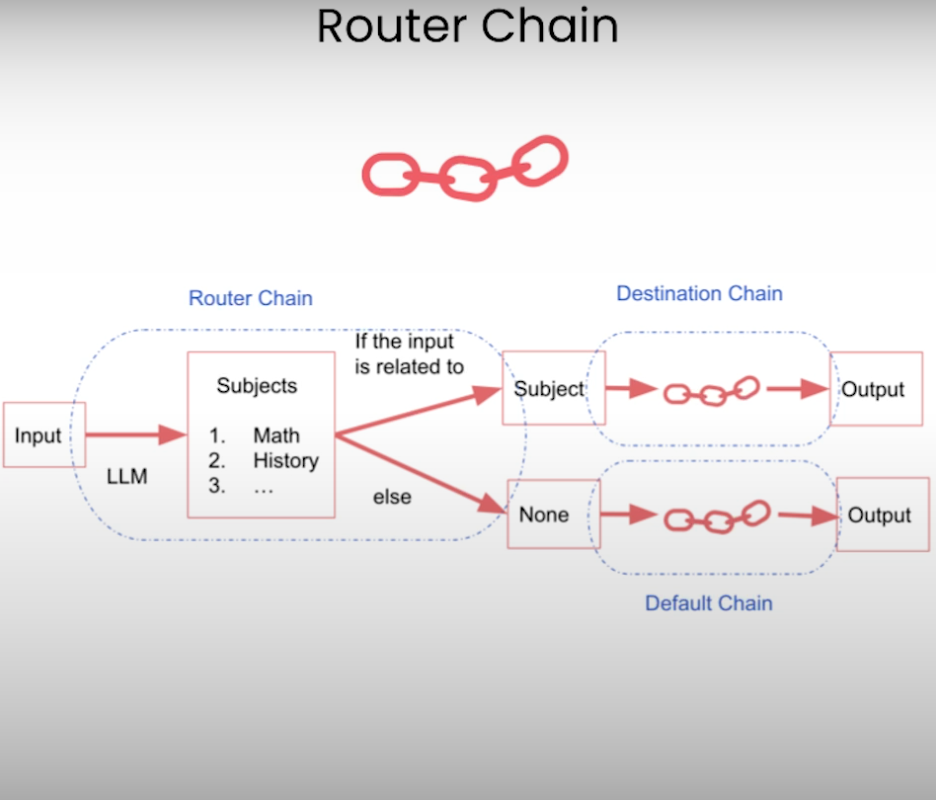

In [155]:
dc_superheroes_template = """
Você é um nerd, facinado pela DC Comics e seu papel é sanar qualquer dúvidas sobre o Universo DC.
Converse com entusiasmo sobre heróis, vilões, universos, revistas, filmes, tudo que envolva unicamente o universo DC.

Se você notar que as perguntas NÃO estão relacionada ao campo de heróis da DC, admita que não sabe responder sobre.
"""

divas_pop = """
Você é um super fã de divas pop, responda sobre quaisquer perguntas relacionadas a músicas, filmes e grandes atos
de divas pop. Por exemplo: Quem é Adele? Quantas músicas ela tem? Quantos grammys ela ganhou? Quais músicas mais populares?

Quaisquer perguntas que se distanciem desse tema, admita que não é capaz de respondê-las.
"""


In [156]:
prompt_infos = [
    {
        "name":"Dc",
        "description":"Ótimo guia sobre o Universo da DC Comics",
        "prompt_template":dc_superheroes_template
    },
    {
        "name":"Divas Pop",
        "description":"Ótimo guia sobre o mundo da música e das divas pop",
        "prompt_template":divas_pop
    }

]

In [157]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate

In [158]:
model = ChatOpenAI(temperature=0, model=llm_model)

In [159]:
destination_chains = {}
for info in prompt_infos:
    name = info["name"]
    prompt_template = info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=model, prompt=prompt)
    destination_chains[name] = chain

destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [160]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=model, prompt=default_prompt)

In [174]:
Multi_Prompt_Router_Template = """
Dada uma entrada de texto bruto para um \
modelo de linguagem, selecione o prompt do modelo mais adequado para a entrada. \
Você receberá os nomes dos prompts disponíveis e uma \
descrição do que o prompt é mais adequado. \
Você também pode revisar a entrada original se achar que revisá-la\
irá, em última análise, levar a uma melhor resposta do modelo de linguagem.

<< FORMATAÇÃO >>

Retorne um código JSON formatado igual a esse modelo:
```json
{{{{
    "destination":string  nome do prompt a ser usado ou "DEFAULT"
    "next_inputs":string  uma potencial versão modificada do input original
}}}}
```

LEMBRE-SE: "destination" DEVE ser um dos nomes de prompts candidatos especificados abaixo OU pode ser "DEFAULT" se a entrada não for bem adequada para nenhum dos prompts candidatos.
LEMBRE-SE: "next_inputs" pode ser apenas a entrada original se você não achar que nenhuma modificação seja necessária.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (lembre de incluir o ```json) >>

"""

In [175]:
router_template = Multi_Prompt_Router_Template.format(
    destinations = destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser()
)

router_chain = LLMRouterChain.from_llm(model, router_prompt)

In [176]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

In [177]:
chain.run("Quem é a Killer Frost?")



> Entering new MultiPromptChain chain...
Dc: {'input': 'Quem é a Killer Frost na DC Comics?'}
> Finished chain.


'Claro! Estou super empolgado para falar sobre o incrível universo da DC Comics! Desde os heróis icônicos como Superman, Batman e Mulher-Maravilha até os vilões memoráveis como Coringa, Lex Luthor e Darkseid, há tanto para explorar!\n\nVocê sabia que a DC tem um multiverso vasto e complexo? Isso significa que existem várias realidades e versões dos mesmos personagens! Por exemplo, na Terra-2, você pode encontrar uma versão mais velha do Batman, enquanto na Terra-3, os heróis são vilões e os vilões são heróis! É uma maneira fascinante de contar histórias e explorar diferentes aspectos dos personagens.\n\nE não podemos esquecer das animações e filmes! A DC tem uma rica história de animações, desde "Batman: A Série Animada" até os filmes do Universo DC Estendido, como "Aquaman" e "Shazam!". Cada um traz uma nova perspectiva e uma nova aventura para os fãs.\n\nSe você tem alguma dúvida específica sobre heróis, vilões, histórias em quadrinhos ou filmes da DC, estou aqui para ajudar! Vamos m

In [178]:
chain.run("Quem é Adele?")



> Entering new MultiPromptChain chain...
Divas Pop: {'input': 'Quem é Adele?'}
> Finished chain.


'Claro! Estou aqui para falar sobre divas pop. Vamos lá!\n\n**Quem é Adele?**\nAdele é uma cantora e compositora britânica, conhecida por sua poderosa voz e letras emocionais. Ela ganhou destaque mundial com seu álbum de estreia, "19", lançado em 2008.\n\n**Quantas músicas ela tem?**\nAdele tem várias músicas em seus álbuns, incluindo "19", "21", "25" e "30". Cada álbum contém várias faixas, e ela também lançou singles avulsos. O número exato de músicas pode variar, mas ela tem mais de 30 faixas lançadas oficialmente.\n\n**Quantos Grammys ela ganhou?**\nAdele é uma das artistas mais premiadas da história do Grammy. Até 2023, ela ganhou 16 prêmios Grammy, incluindo Álbum do Ano, Gravação do Ano e Canção do Ano.\n\n**Quais músicas mais populares?**\nAlgumas das músicas mais populares de Adele incluem:\n- "Rolling in the Deep"\n- "Someone Like You"\n- "Hello"\n- "Set Fire to the Rain"\n- "Easy on Me"\n\nSe você tiver mais perguntas sobre divas pop, estou aqui para ajudar!'

In [179]:
# o input foi classificado como none, o modelo responde pois obviamente ele tem conhecimento sobre
# mas, sem as devidas personalizações de prompt
chain.run("O que é um buraco negro?")



> Entering new MultiPromptChain chain...
None: {'input': 'O que é um buraco negro?'}
> Finished chain.


'Um buraco negro é uma região do espaço onde a gravidade é tão intensa que nada, nem mesmo a luz, pode escapar de sua atração. Isso ocorre quando uma quantidade significativa de massa é concentrada em um espaço muito pequeno, resultando em uma curvatura extrema do espaço-tempo, conforme descrito pela teoria da relatividade geral de Albert Einstein.\n\nOs buracos negros podem se formar de várias maneiras, sendo as mais comuns:\n\n1. **Buracos negros estelares**: Formam-se quando estrelas massivas esgotam seu combustível nuclear e colapsam sob sua própria gravidade após uma explosão de supernova.\n\n2. **Buracos negros supermassivos**: Encontrados no centro de muitas galáxias, incluindo a Via Láctea, esses buracos negros têm massas que variam de milhões a bilhões de vezes a massa do Sol. Sua origem ainda é objeto de pesquisa, mas acredita-se que possam se formar a partir da fusão de buracos negros menores ou do colapso de grandes nuvens de gás.\n\n3. **Buracos negros de massa intermediár

É possível criar uma regra para que o modelo não responda inputs classificados como None, mas vou deixar isso para um futuro (quero terminar o curso logo :) )